In [18]:
from pathlib import Path

import galah
import geopandas as gpd


In [19]:
galah.galah_config(
    email="ala.italics539@simplelogin.com",
    atlas="Australia",
)

In [20]:
target_species = [
    "Lagarostrobos franklinii",
    "Athrotaxis cupressoides",
    "Athrotaxis selaginoides",
    "Nothofagus gunnii",
    "Nothofagus cunninghamii",
]

galah.search_taxa(taxa=target_species)


,scientificName,scientificNameAuthorship,taxonConceptID,rank,kingdom,phylum,order,family,genus,species,vernacularName,issues
0,Lagarostrobos franklinii,(Hook.f.) Quinn,https://id.biodiversity.org.au/node/apni/2892878,species,Plantae,Charophyta,Pinales,Podocarpaceae,Lagarostrobos,Lagarostrobos franklinii,Huon Pine,noIssue
1,Athrotaxis cupressoides,D.Don,https://id.biodiversity.org.au/node/apni/2909339,species,Plantae,Charophyta,Pinales,Cupressaceae,Athrotaxis,Athrotaxis cupressoides,Pencil Pine,noIssue
2,Athrotaxis selaginoides,D.Don,https://id.biodiversity.org.au/taxon/apni/5127...,species,Plantae,Charophyta,Pinales,Cupressaceae,Athrotaxis,Athrotaxis selaginoides,King Billy Pine,noIssue
3,Nothofagus gunnii,(Hook.f.) Oerst.,https://id.biodiversity.org.au/node/apni/7726150,species,Plantae,Charophyta,Fagales,Nothofagaceae,Nothofagus,Nothofagus gunnii,Tanglefoot,noIssue
4,Nothofagus cunninghamii,(Hook.) Oerst.,https://id.biodiversity.org.au/node/apni/7725767,species,Plantae,Charophyta,Fagales,Nothofagaceae,Nothofagus,Nothofagus cunninghamii,Myrtle Beech,noIssue


In [21]:
occurrences = galah.atlas_occurrences(
    taxa=target_species,
)
occurrences = occurrences.dropna(subset=["decimalLongitude", "decimalLatitude"])

In [22]:
occurrences_gdf = gpd.GeoDataFrame(
    occurrences,
    geometry=gpd.points_from_xy(
        occurrences["decimalLongitude"], occurrences["decimalLatitude"]
    ),
    crs="EPSG:4326",
)
occurrences_gdf = occurrences_gdf.to_crs("EPSG:7855")

In [23]:
# Read in Tasmania boundary file
tasmania = gpd.read_file(Path.cwd().parent / "data/vector/tasmania_boundary.geojson")

if tasmania.crs != occurrences_gdf.crs:
    tasmania = tasmania.to_crs(occurrences_gdf.crs)

tas_occurrences = gpd.sjoin(
    occurrences_gdf, tasmania, how="inner", predicate="intersects"
)


print(f"Total records: {len(occurrences_gdf)}")
print(f"Records in Tasmania: {len(tas_occurrences)}")


Total records: 12881
Records in Tasmania: 10229


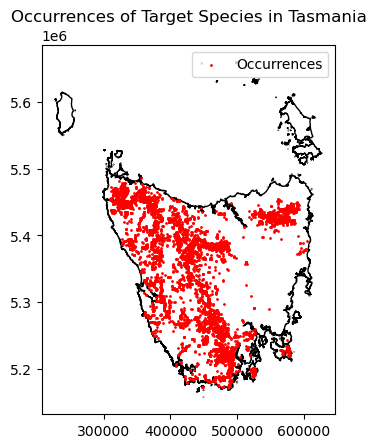

In [24]:
base = tasmania.plot(
    color="white",
    edgecolor="black",
)
tas_occurrences.plot(
    ax=base,
    color="red",
    markersize=1,
    label="Occurrences",
)
base.set_title("Occurrences of Target Species in Tasmania")
base.legend()


In [25]:
tas_occurrences.to_file(
    Path.cwd().parent / "data/vector/ala_occurences.geojson", driver="GeoJSON"
)